In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import gym

In [3]:
#The Brain with a deep-q network

class Brain:
    def __init__(self, nInputs, nOutputs, learningRate, dqnConfig=None):
        self.nInputs = nInputs
        self.nOutputs = nOutputs
        self.learningRate = learningRate
        self.model = Sequential()
        self.model.add(Dense(units=32, activation='relu', input_shape=(self.nInputs,)))
        self.model.add(Dense(units=16, activation='relu'))
        self.model.add(Dense(units=nOutputs))
        self.model.compile(optimizer=Adam(lr=self.learningRate), loss='mean_squared_error')
        if(dqnConfig != None):
            self.dqn = self.DeepQNetwork(dqnConfig)

    class DeepQNetwork:
        def __init__(self, dqnConfig):
            self.maxMemory = dqnConfig['maxMemory']
            self.gamma = dqnConfig['discount']
            self.dqnMemory = list()
        
        def storeExp(self, transition, gameOver):
            self.dqnMemory.append([transition, gameOver])
            if(len(self.dqnMemory) > self.maxMemory):
                self.dqnMemory.pop(0)
        
        def retrieveExp(self, batchSize, brain):
            nInputs = brain.nInputs
            nOutputs = brain.nOutputs
            inputs = np.zeros((min(batchSize, len(self.dqnMemory)), nInputs))
            targetqs = np.zeros((min(batchSize, len(self.dqnMemory)), nOutputs))
            i = 0
            for inx in np.random.randint(0, len(self.dqnMemory), size=min(batchSize, len(self.dqnMemory))):
                currentState, action, reward, nextState = self.dqnMemory[inx][0]
                gameOver = self.dqnMemory[inx][1]
                inputs[i] = currentState
                targetqs[i] = brain.model.predict(currentState)[0]   #get initial arbitrary output to be replaced by the values from bellman equation
                #Update target q-values with calculated q-values from bellman equation for q-learning
                if(gameOver):
                    targetqs[i][action] = reward
                else:
                    targetqs[i][action] = reward + self.gamma*np.max(brain.model.predict(nextState)[0])
                i += 1
            return (inputs,targetqs)

In [4]:
import gym
class Agent:
    def  __init__(self, epochs, config):
        self.brain = Brain(config['nInputs'], config['nOutputs'], config['learningRate'], config['dqnConfig'])
        self.epochs = epochs
        self.totalReward = 0
        self.rewards = []
        self.epsilon = config['epsilon']
        self.epsilonDecayRate = config['epsilonDecayRate']
        self.batchSize = config['batchSize']
        self.env = gym.make('MountainCar-v0')
    
    def play(self):
        epoch = 0
        while(epoch < epochs):
            epoch += 1
            self.env.reset()
            currentState = np.zeros((1,2))
            nextState = currentState
            gameOver = False
            while not gameOver:
                action = None
                if(np.random.rand() <= self.epsilon):
                    action = np.random.randint(0, 3)
                else:
                    qvalues = self.brain.model.predict(currentState)[0]
                    action = np.argmax(qvalues)
                nextState[0], reward, gameOver, _ = self.env.step(action)
                self.env.render()
                self.totalReward += reward
                
                #Store experience in DQN Memory
                transition = [currentState, action, reward, nextState]
                self.brain.dqn.storeExp(transition, gameOver)
                experience = self.brain.dqn.retrieveExp(self.batchSize, self.brain)
                inputs = experience[0]
                targetqs = experience[1]
                self.brain.model.train_on_batch(inputs, targetqs)
                currentState = nextState
            self.epsilon = self.epsilon*self.epsilonDecayRate
            print('Epoch: ' + str(epoch) +', Epsilon: ' + str(self.epsilon) + ', Total Reward: ' + str(self.totalReward))
            #Store the total rewards obtained in this epoch              
            self.rewards.append(self.totalReward)
            self.totalReward = 0
            plt.plot(self.rewards)
            plt.xlabel('Epoch')
            plt.ylabel('Rewards')
            plt.show()
        self.env.close()
           
            
                
            
            
        

Epoch: 1, Epsilon: 0.995, Total Reward: -200.0


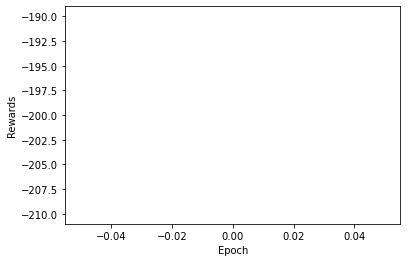

Epoch: 2, Epsilon: 0.990025, Total Reward: -200.0


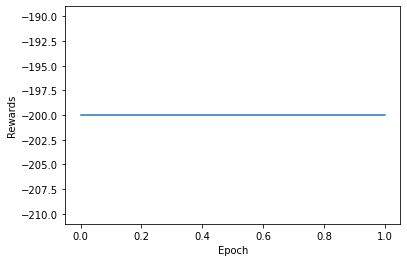

Epoch: 3, Epsilon: 0.985074875, Total Reward: -200.0


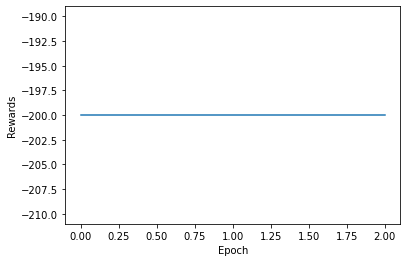

Epoch: 4, Epsilon: 0.9801495006250001, Total Reward: -200.0


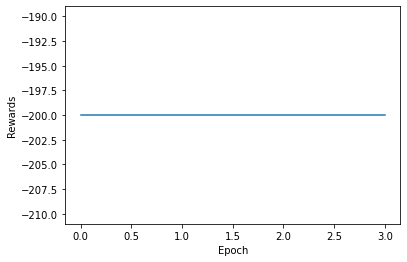

Epoch: 5, Epsilon: 0.9752487531218751, Total Reward: -200.0


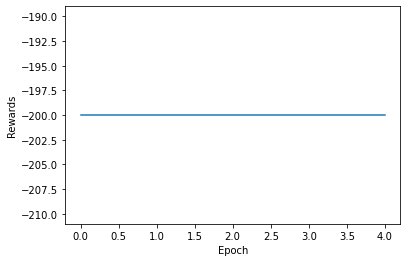

Epoch: 6, Epsilon: 0.9703725093562657, Total Reward: -200.0


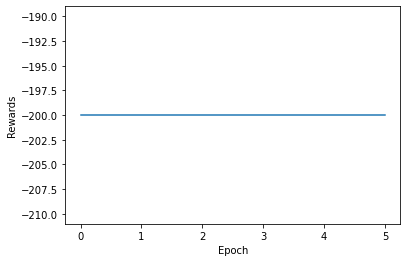

Epoch: 7, Epsilon: 0.9655206468094844, Total Reward: -200.0


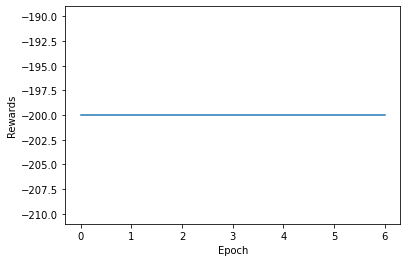

Epoch: 8, Epsilon: 0.960693043575437, Total Reward: -200.0


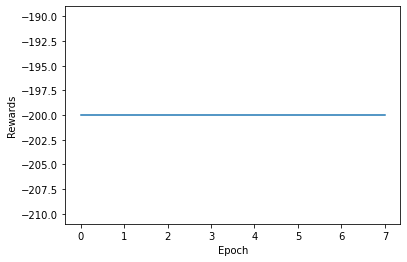

Epoch: 9, Epsilon: 0.9558895783575597, Total Reward: -200.0


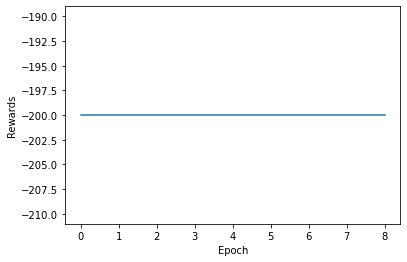

Epoch: 10, Epsilon: 0.9511101304657719, Total Reward: -200.0


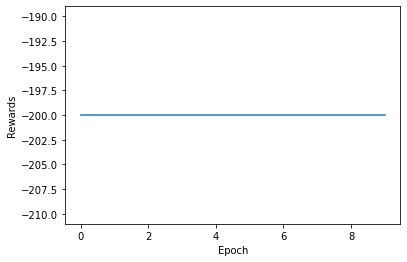

Epoch: 11, Epsilon: 0.946354579813443, Total Reward: -200.0


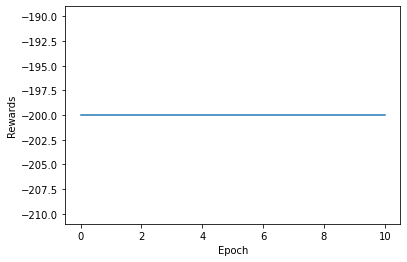

Epoch: 12, Epsilon: 0.9416228069143757, Total Reward: -200.0


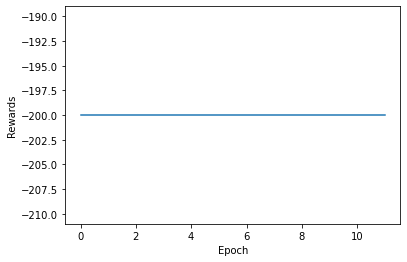

Epoch: 13, Epsilon: 0.9369146928798039, Total Reward: -200.0


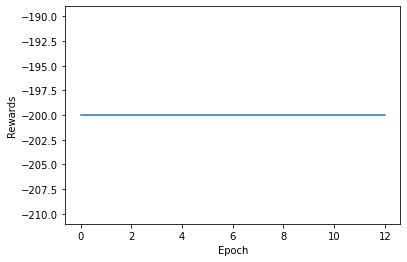

Epoch: 14, Epsilon: 0.9322301194154049, Total Reward: -200.0


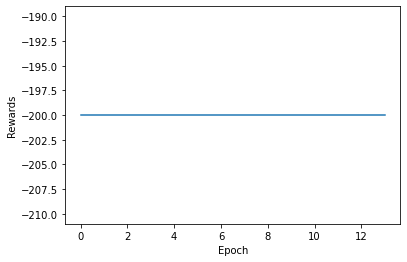

Epoch: 15, Epsilon: 0.9275689688183278, Total Reward: -200.0


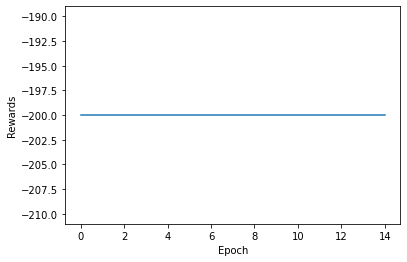

Epoch: 16, Epsilon: 0.9229311239742362, Total Reward: -200.0


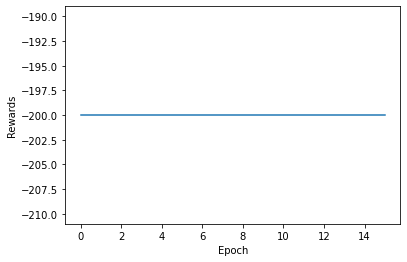

Epoch: 17, Epsilon: 0.918316468354365, Total Reward: -200.0


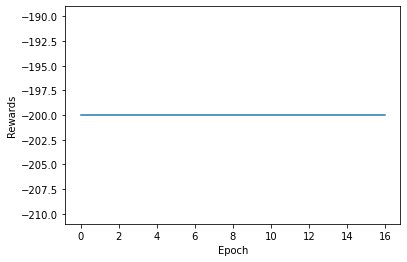

Epoch: 18, Epsilon: 0.9137248860125932, Total Reward: -200.0


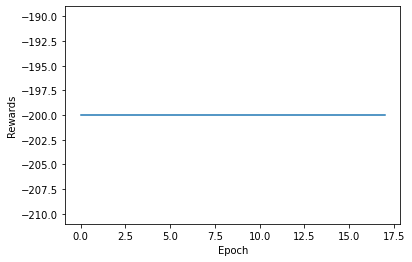

Epoch: 19, Epsilon: 0.9091562615825302, Total Reward: -200.0


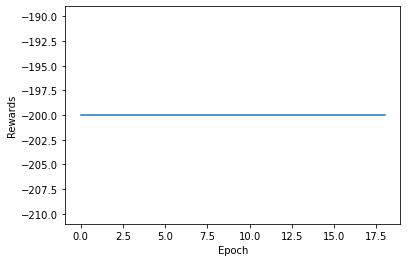

Epoch: 20, Epsilon: 0.9046104802746175, Total Reward: -200.0


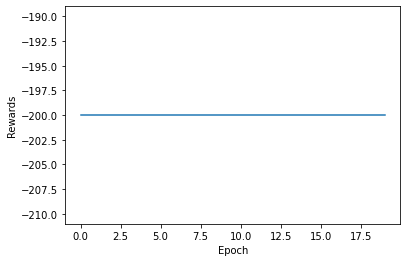

Epoch: 21, Epsilon: 0.9000874278732445, Total Reward: -200.0


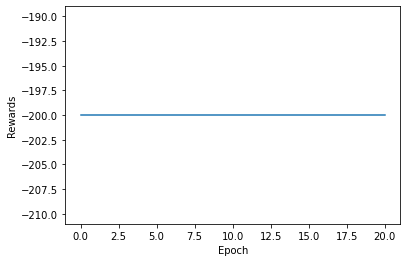

Epoch: 22, Epsilon: 0.8955869907338783, Total Reward: -200.0


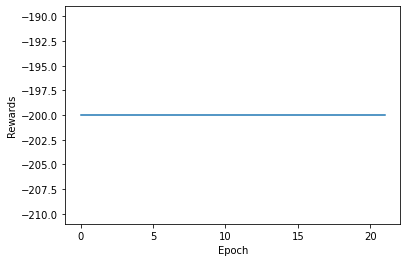

Epoch: 23, Epsilon: 0.8911090557802088, Total Reward: -200.0


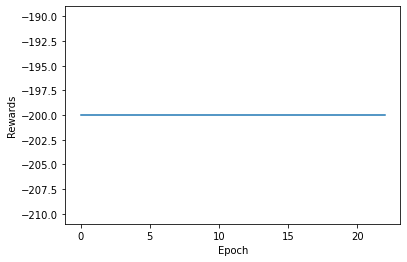

Epoch: 24, Epsilon: 0.8866535105013078, Total Reward: -200.0


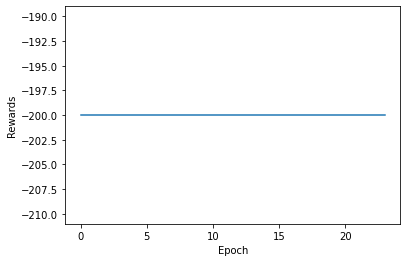

Epoch: 25, Epsilon: 0.8822202429488013, Total Reward: -200.0


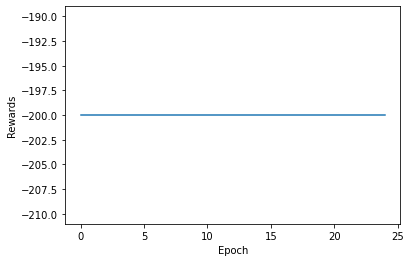

Epoch: 26, Epsilon: 0.8778091417340573, Total Reward: -200.0


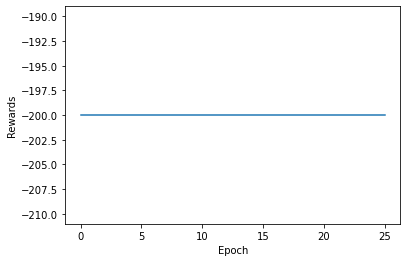

Epoch: 27, Epsilon: 0.8734200960253871, Total Reward: -200.0


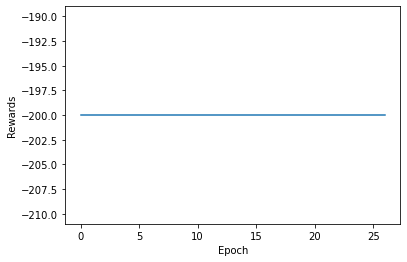

Epoch: 28, Epsilon: 0.8690529955452602, Total Reward: -200.0


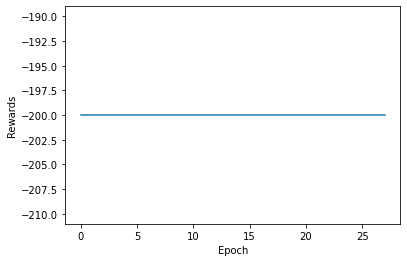

Epoch: 29, Epsilon: 0.8647077305675338, Total Reward: -200.0


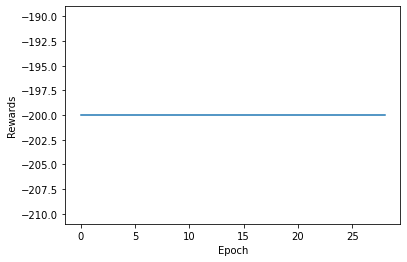

Epoch: 30, Epsilon: 0.8603841919146962, Total Reward: -200.0


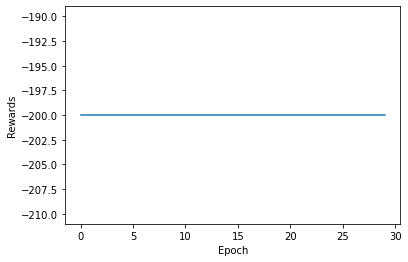

Epoch: 31, Epsilon: 0.8560822709551227, Total Reward: -200.0


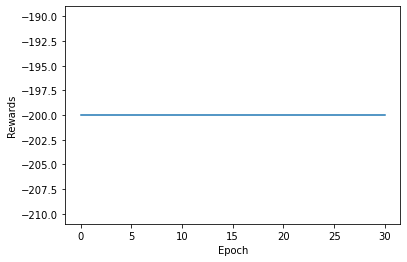

Epoch: 32, Epsilon: 0.851801859600347, Total Reward: -200.0


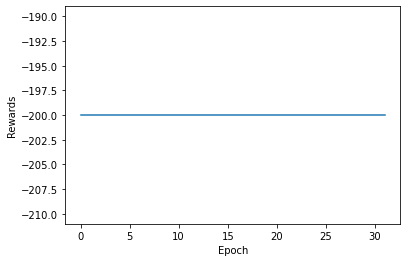

Epoch: 33, Epsilon: 0.8475428503023453, Total Reward: -200.0


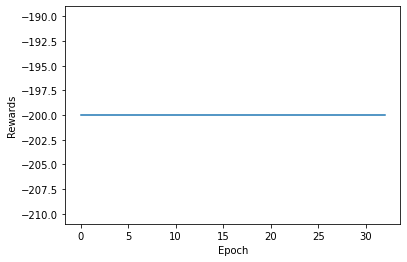

Epoch: 34, Epsilon: 0.8433051360508336, Total Reward: -200.0


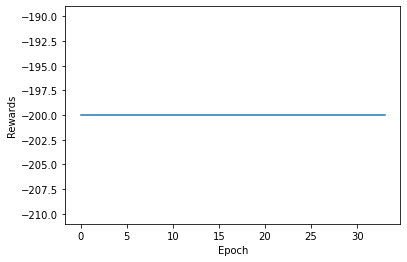

Epoch: 35, Epsilon: 0.8390886103705794, Total Reward: -200.0


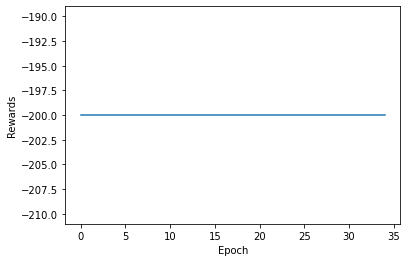

Epoch: 36, Epsilon: 0.8348931673187264, Total Reward: -200.0


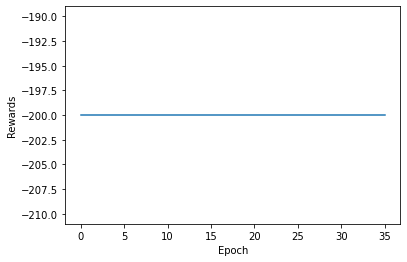

Epoch: 37, Epsilon: 0.8307187014821328, Total Reward: -200.0


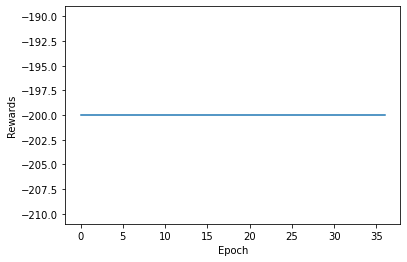

Epoch: 38, Epsilon: 0.8265651079747222, Total Reward: -200.0


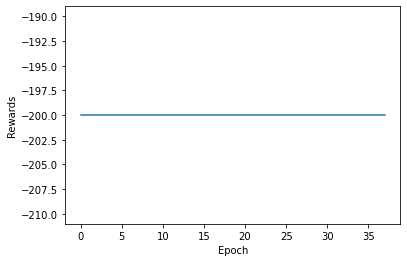

Epoch: 39, Epsilon: 0.8224322824348486, Total Reward: -200.0


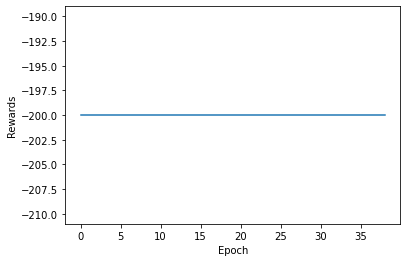

Epoch: 40, Epsilon: 0.8183201210226743, Total Reward: -200.0


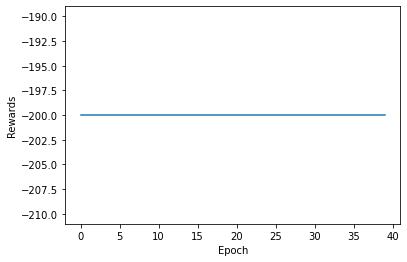

In [ ]:
config = {
    'batchSize': 30,
    'nInputs': 2, 
    'nOutputs': 3, 
    'learningRate':0.01, 
    'dqnConfig':
          {
              'maxMemory': 50000,
              'discount': 0.9
          },
    'epsilon': 1.0,
    'epsilonDecayRate': 0.995
}
epochs = 10000
agent = Agent(epochs, config)
agent.play()